In [1]:
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\python.exe -m pip install --upgrade pip' command.


In [ ]:
import numpy as np

def gaussian_func(x: np.ndarray, k: int, theta: np.ndarray, mu: np.ndarray,
        sigma: np.ndarray):
    result = np.zeros(len(x))
    for i in range(k):
        result += theta[i] * np.exp(-0.5 * np.power((x - mu[i]) / sigma[i], 2))
    return result

def func(parameters: nd.ndarray, *args) -> float:
    theta, mu, sigma = np.split(parameters, 3)
    x, y, k = args
    delta = y - gaussian_func(x, k, theta, mu, sigma)
    return np.sum(np.power(delta))

def func_jac(parameters: nd.ndarray, *args) -> float:
    return np.sum(x)

def func_hess(x: nd.ndarray, *args) -> float:
    return np.sum(x)

def lsq_gaussian(x: np.ndarray, y: np.ndarray, k: int) -> np.ndarray:
    if (not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray)
            or not isinstance(k, int)):
        raise TypeError()
    n = len(x)
    if (len(x.shape) != 1 or n < 2 or x.shape != y.shape or k < 1):
        raise ValueError()
    result = minimize(fun=min_func, x0=x0, args=(x, y, k), hess=min_func_hess, jac=min_func_jac)

In [9]:
from math import cos, sin

def f(x: float) -> float:
    return 1.0 + 1.5 * x + 2.0 * cos(3.0 * x) + 3.0 * sin(7.0 * x)

start, stop = 0.0, 4.0
x = np.linspace(start, stop, 100)
f_vectorize = np.vectorize(f)
y = f_vectorize(x)

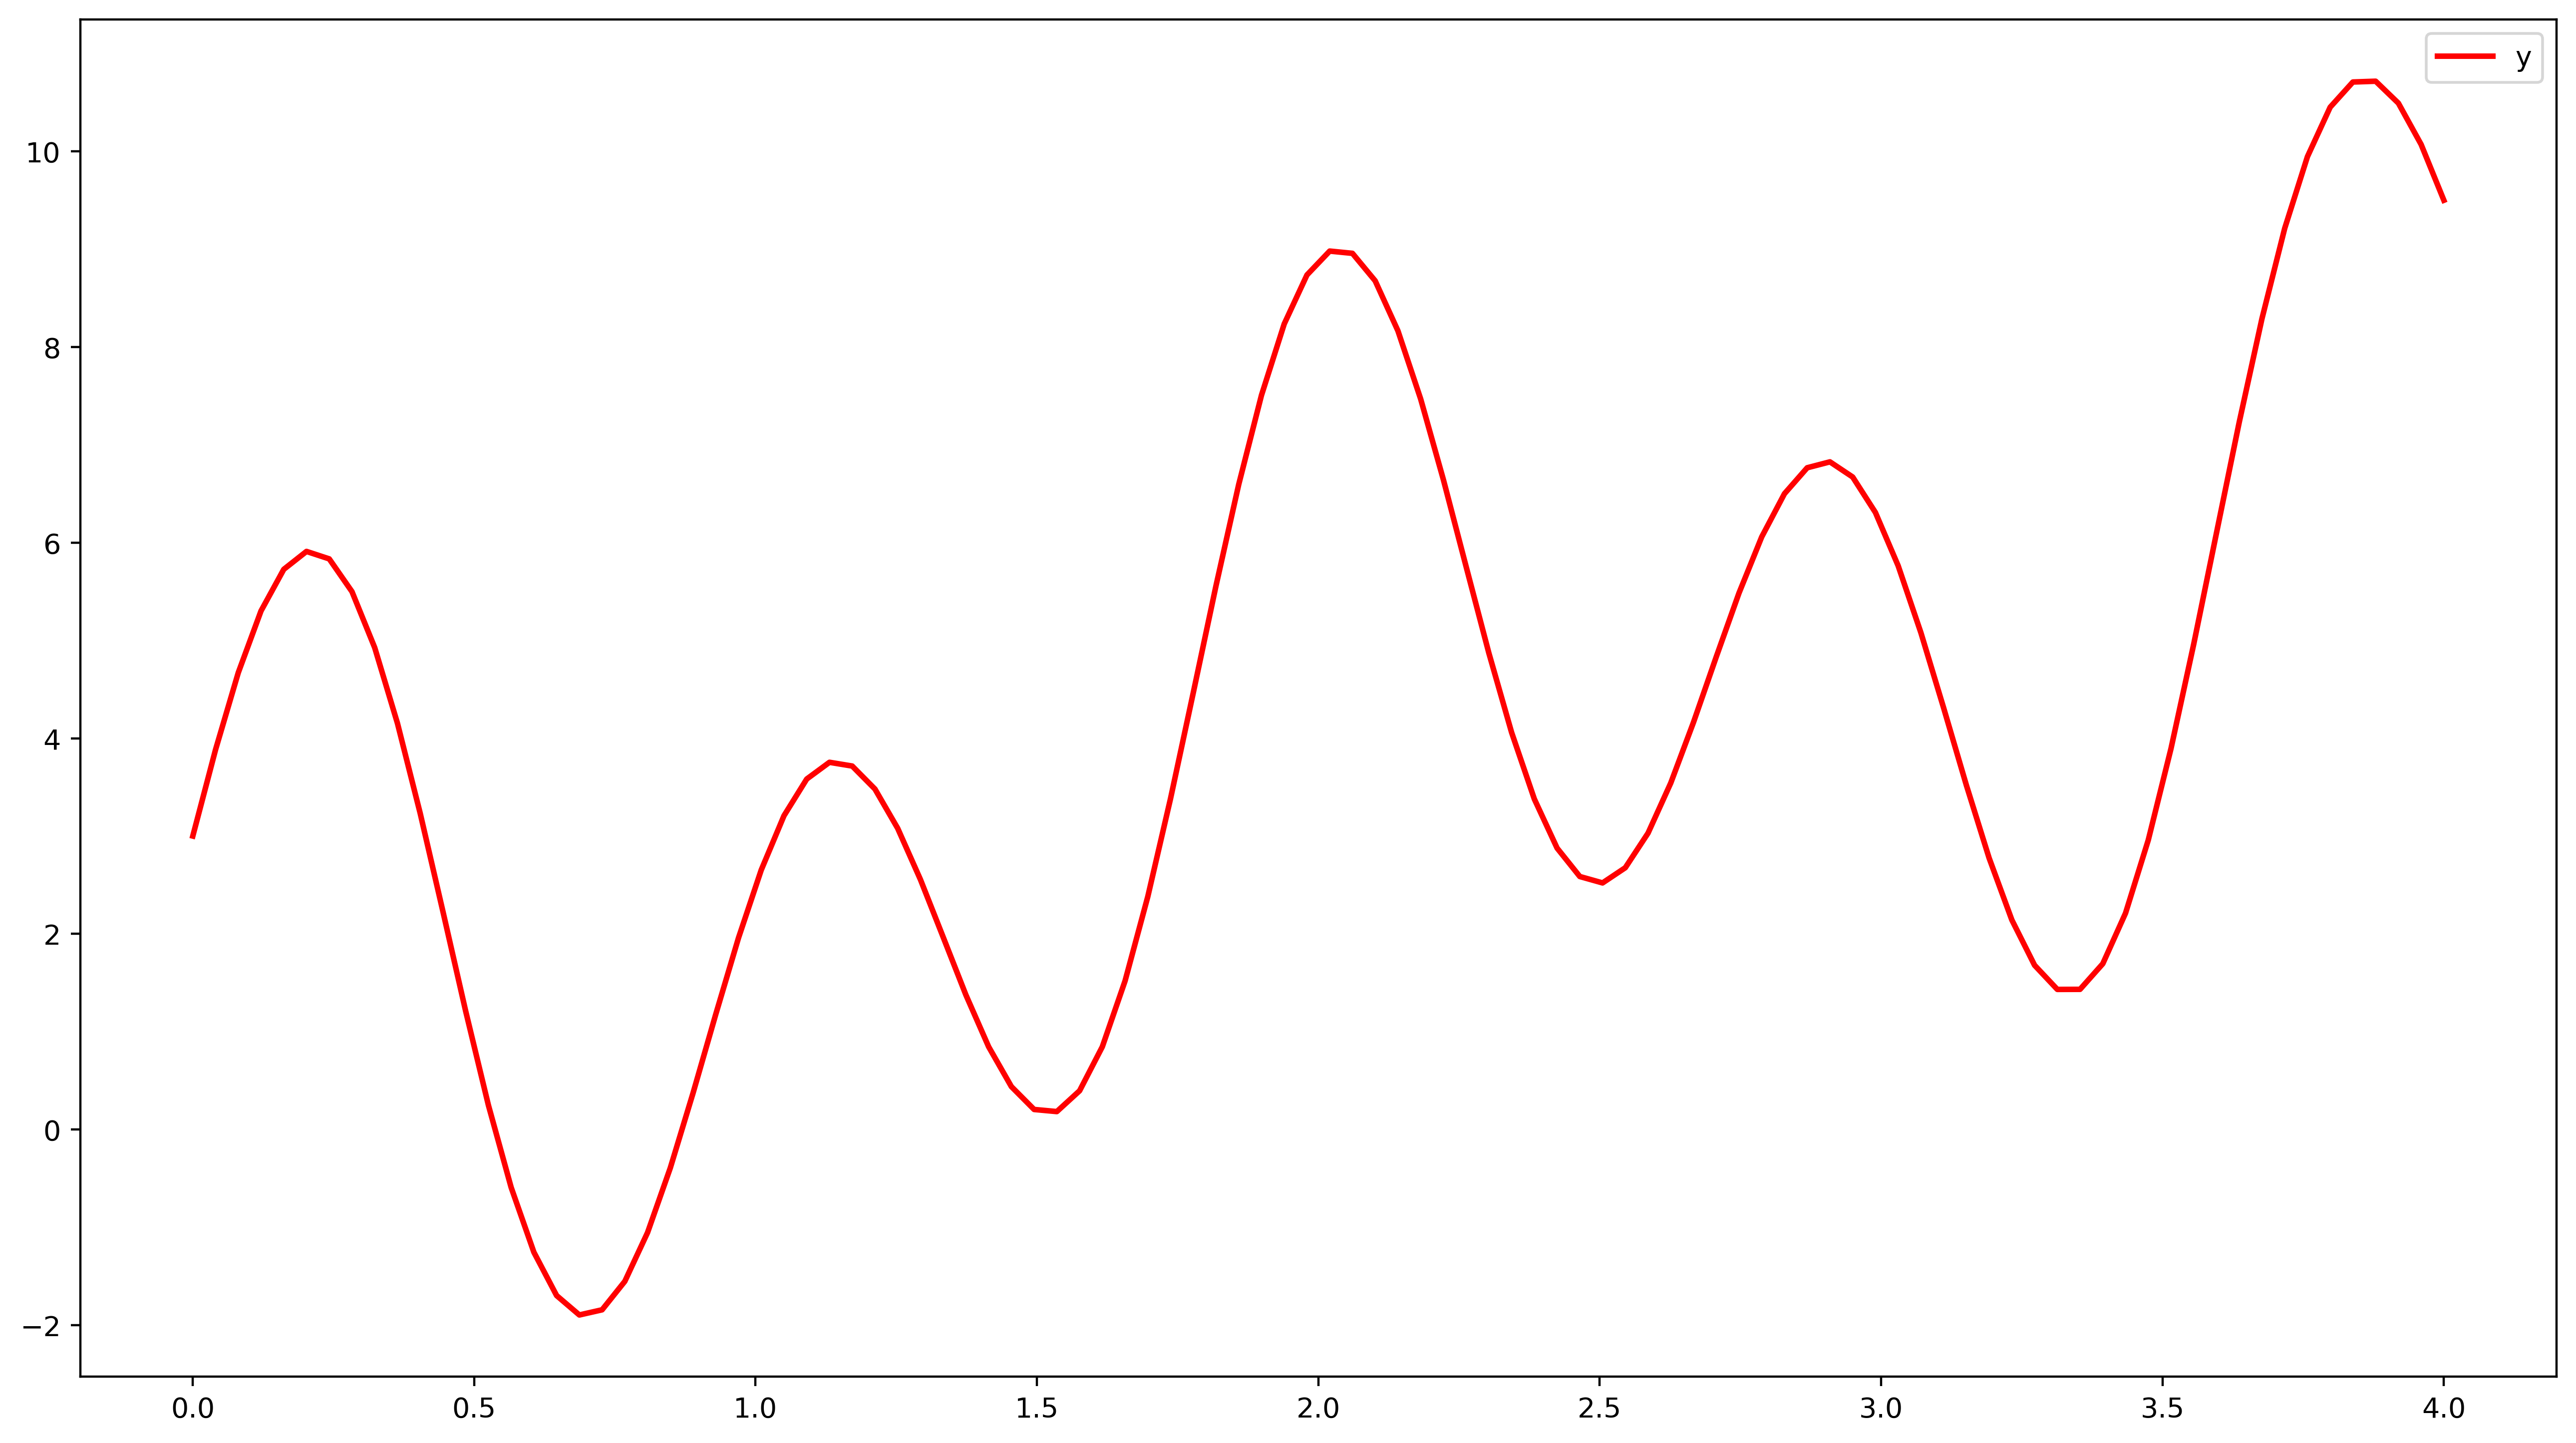

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(x, y, color='red', lw=2, label='y')
plt.legend()
plt.show()

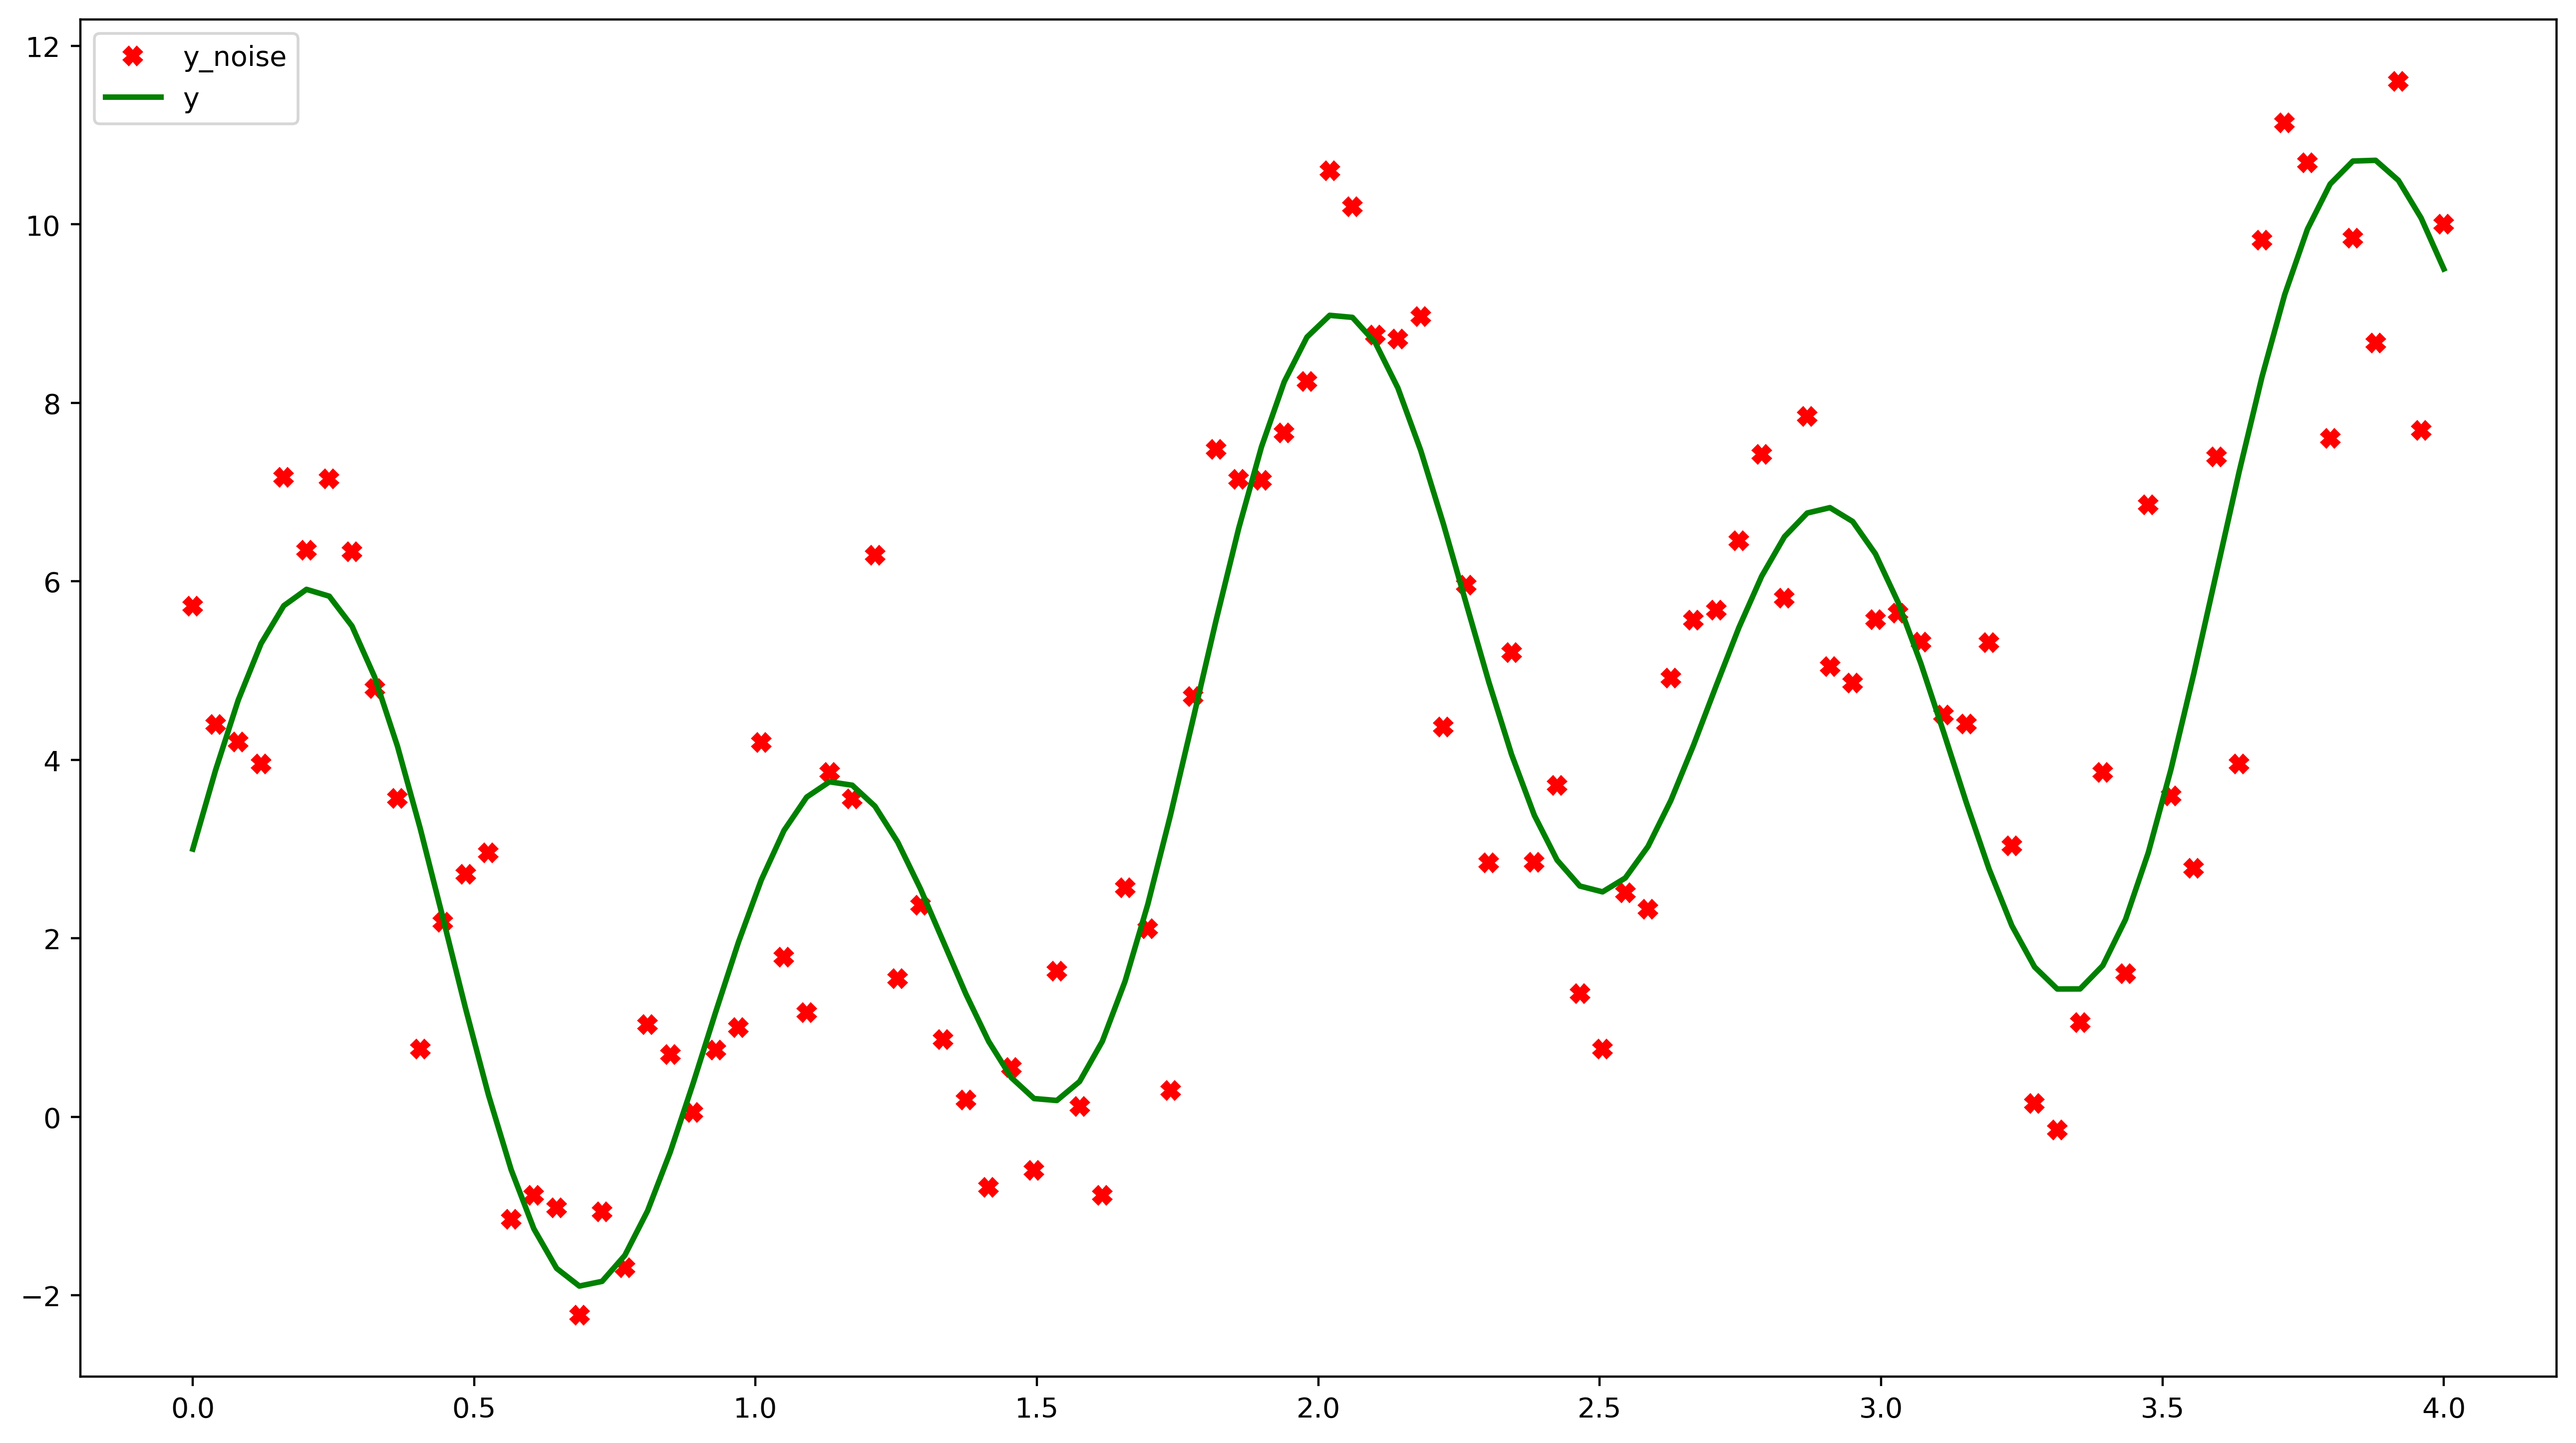

In [11]:
from numpy.random import normal

n = len(x)
y_noise = y + normal(loc=0.0, scale=1.25, size=n)
fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(x, y_noise, 'Xr', label='y_noise')
subplot.plot(x, y, color='green', lw=2, label='y')
plt.legend()
plt.show()

In [12]:
def approx_func(x: np.ndarray, k: int, theta: np.ndarray, mu: np.ndarray, sigma: np.ndarray):
    result = np.zeros(len(x))
    for i in range(k):
        result += theta[i] * np.exp(-np.power((x - mu[i]) / sigma[i], 2.0))
    return result

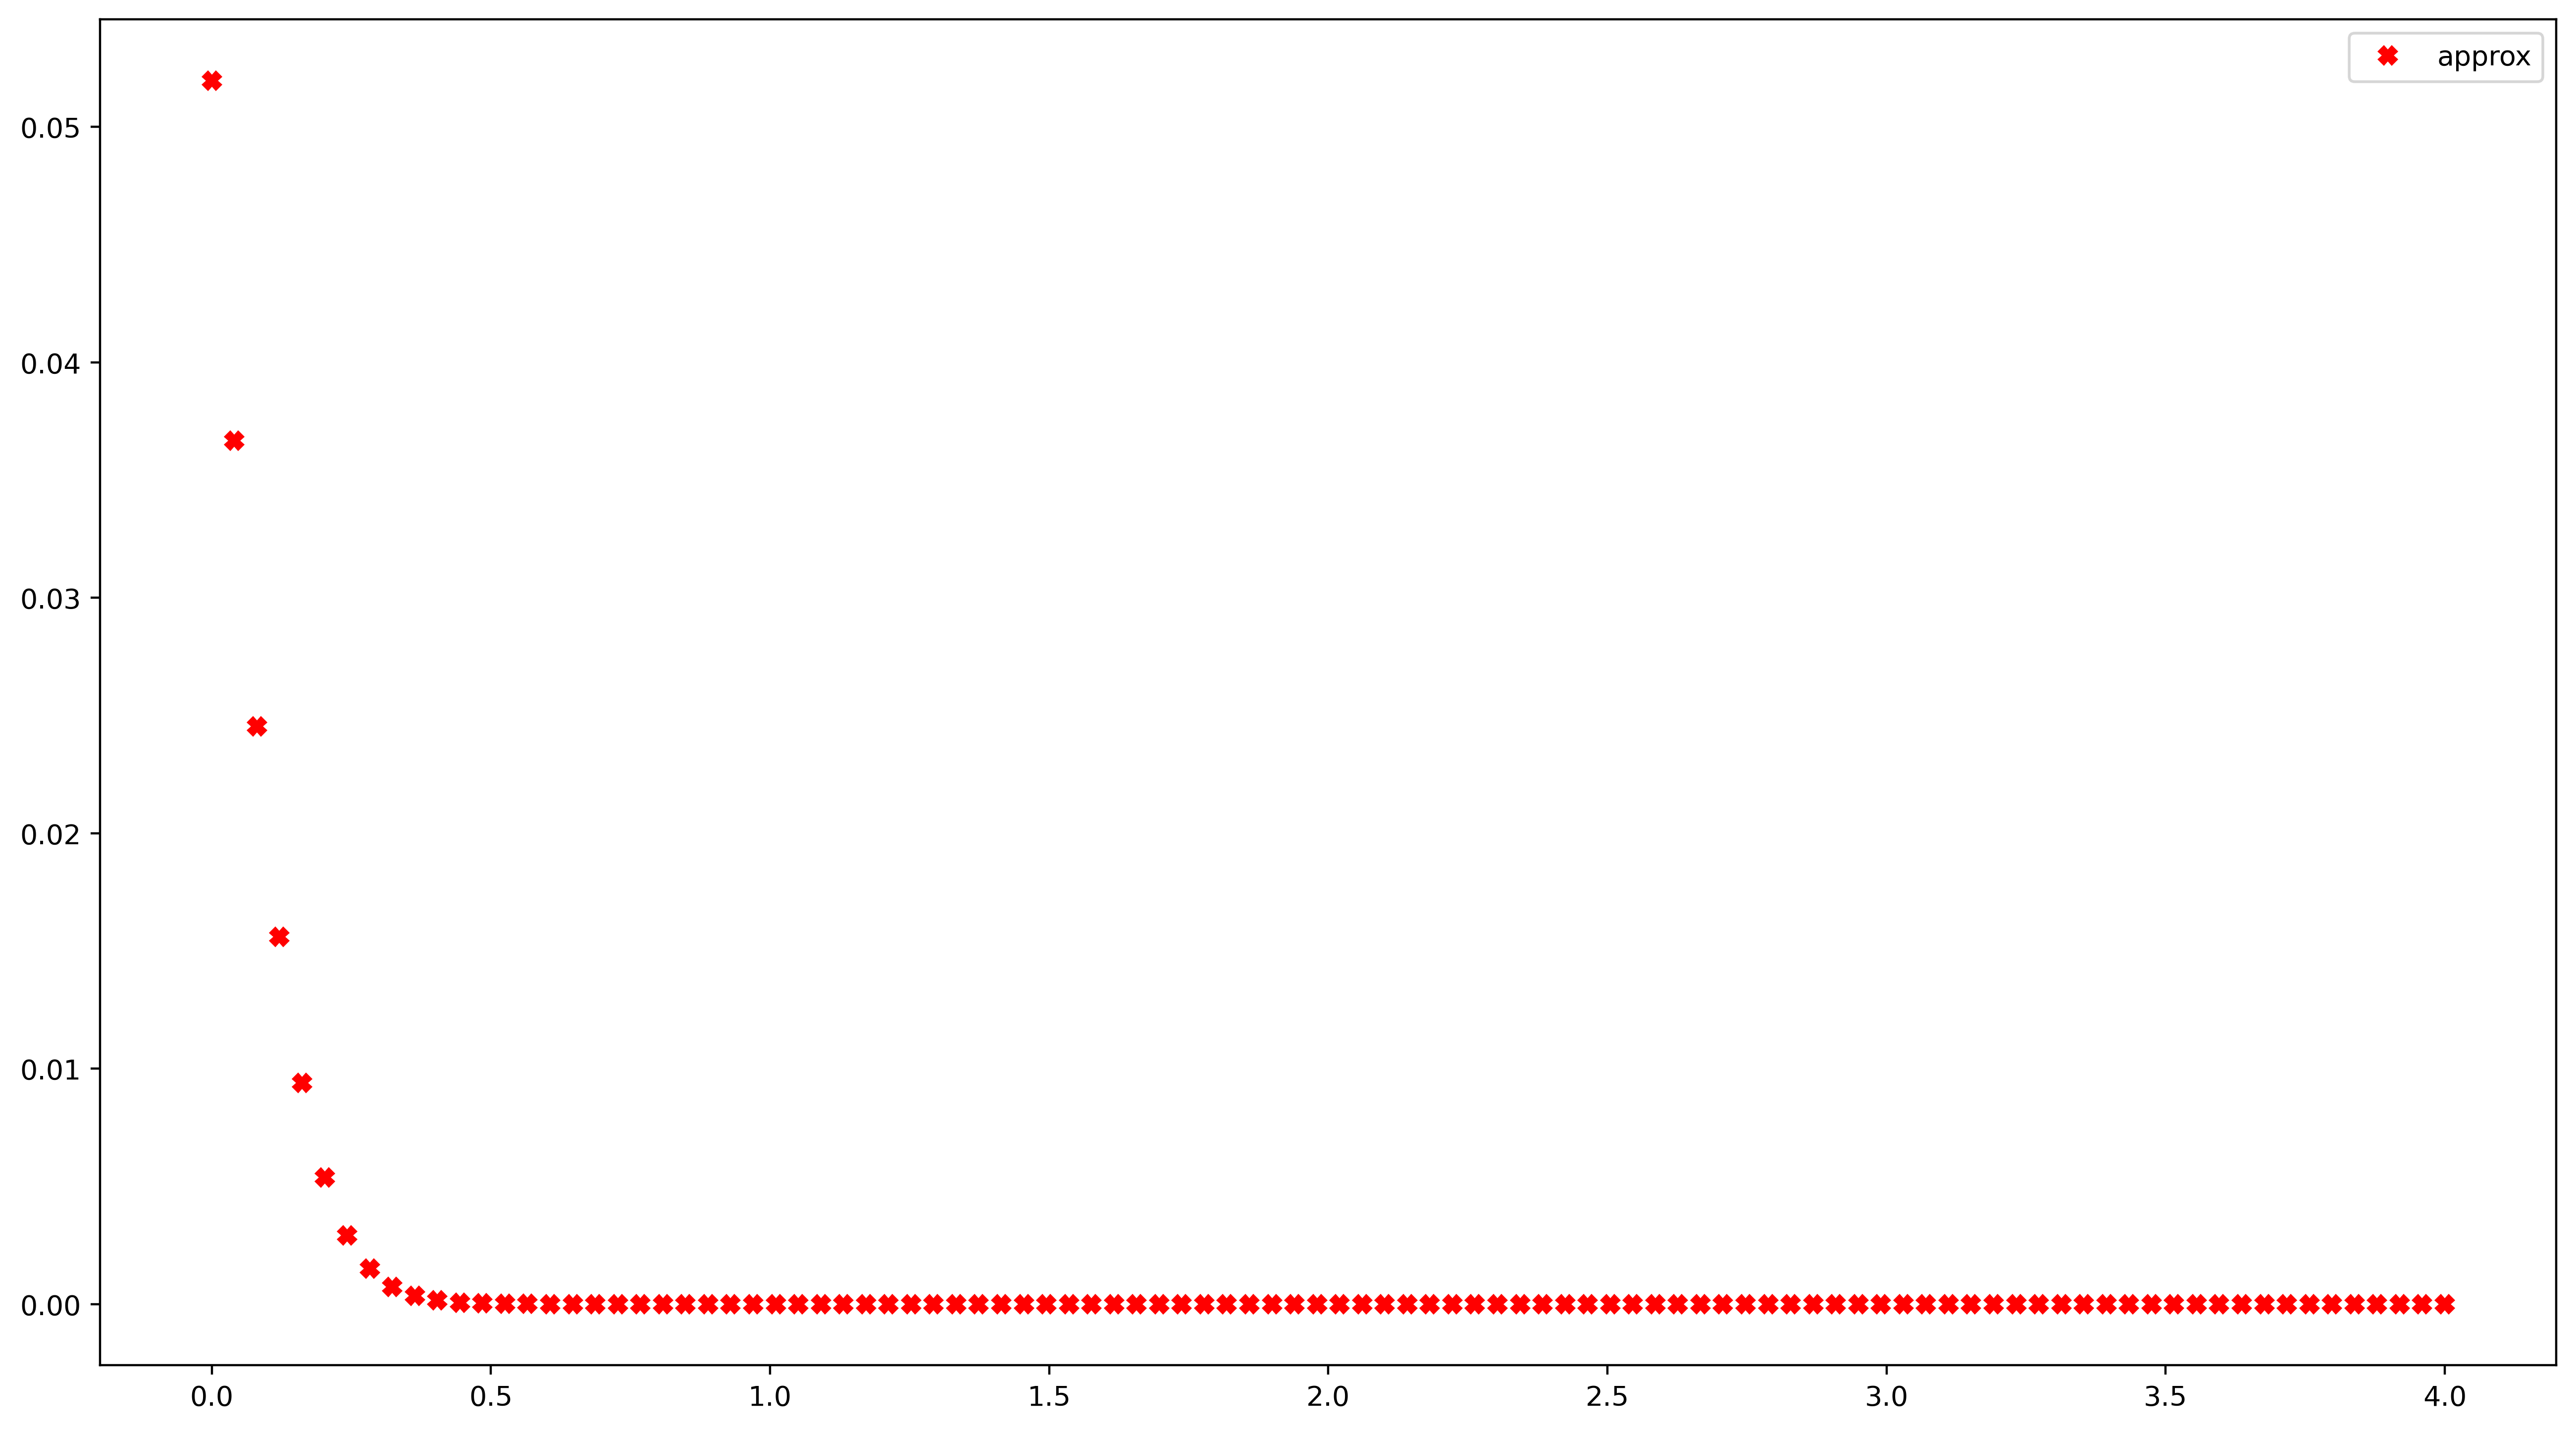

[ 0.14141414 -0.46464646  0.78787879  1.11111111  1.43434343  1.75757576
  2.08080808  2.4040404 ]
[-0.25 -0.75 -1.25 -1.75 -2.25 -2.75 -3.25 -3.75]
[-0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25]


In [17]:
k = 8
parameters = np.zeros(k * 3)
step = (start - stop) / k
for i in range(k):
    parameters[i] = np.sum(x[i * k : k * (i + 1)]) / k
    parameters[k + i] = start + (i + 0.5) * step
parameters[2 * k : 3 * k] = step / 2
parameters[1] *= -1

theta = parameters[: k]
mu = parameters[k : 2 * k]
sigma = parameters[2 * k :]

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(x, approx_func(x, k, theta, mu, sigma), 'Xr', label='approx')
# subplot.plot(x, y, color='green', lw=2, label='y')
plt.legend()
plt.show()
print(theta)
print(mu)
print(sigma)

In [22]:
np.linalg.norm(np.array([3, 4]))
np.power(np.array([3, 4]), 2)

array([ 9, 16], dtype=int32)